### 基于数据集多重抽样的分类器

**元算法(meta-algorithm)** 是对其他算法进行组合的一种方式。Adaboosting算法是最流行的元算法。

将不同的分类器组合起来，这种组合结果被称为**集成方法(ensemble method)** 或者**元算法(meta-algorithm)** 。使用集成方法时会有多种形式：可以是不同算法的集成，也可以是同一算法在不同设置下的集成，还可以是数据集不同部分分配给不同分类器之后的集成。

AdaBoost算法的优缺点

- 优点：泛化错误低，易编码，可以应用在大部分分类器上，无参数调整。  
- 缺点：对离群点敏感。  
- 适用数据类型：数值型和标称型。

#### bagging：基于数据随机重抽样的分类器构建算法

**自举汇聚法(bootstrap aggregating)** 也称为bagging方法，是在从原始数据集选择S次后得到S个新数据集的一种技术。新数据集和原数据集的大小相等。每个数据集都是**通过在原始数据集中随机选择一个样本来进行替换**而得到的。这里的替换意味着可以**多次选择同一个样本** 。

这个性质允许新的数据集中**可以有重复的值** 。更先进的bagging方法比如**随机森林(random forest)** 。

#### boosting

boosting是一种与bagging类似的技术。不管是在boosting还是在bagging中，所使用的多个分类器的类型都是一致的。但boosting不同的分类器是通过**串行训练** 获得的，每个新分类器都根据已训练出的分类器的性能来进行训练。boosting是通过**集中关注被已有分类器错分的那些数据**来获得新的分类器。

boosting分类的结果是基于所有分类器的加权求和结果的，因此boosting与bagging不一样。**bagging中分类器的权重是相等的，boosting中分类器的权重并不相等**，每个权重代表的是其对应分类器在上一轮迭代中的成功度。

AdaBoosting的一般流程

(1)收集数据：可以使用任意方法。  
(2)准备数据：依赖于所使用的弱分类器类型，本章使用的是单层决策树，这种分类器可以处理任何数据类型。当然也可以使用任意分类器作为弱分类器，第2章到第6章中的任一分类器都可以充当弱分类器。作为弱分类器，简单分类器的效果更好。  
(3)分析数据：可以使用任意方法。  
(4)训练算法：AdaBoost的大部分时间都用在训练上，分类器将多次在同一个数据集上训练弱分类器。  
(5)测试算法：计算分类器的错误率。  
(6)使用算法：同SVM一样，AdaBoost预测两个类别中的一个。如果想把它应用到多个类别的场景，那么就要像多类SVM中的做法一样对AdaBoost进行修改。

### 训练算法：基于错误提升分类器的性能

AdaBoost是adaptive boosting(自适应boosting)的缩写，其运行过程如下：

训练数据中的每个样本，并赋予其一个权重，这些权重构成了向量D。一开始，这些权重都初始化成相等值。首先在训练数据上训练出一个弱分类器并计算该分类的错误率，然后在同一数据集上再次训练弱分类器，在分类器的第二次训练中，将会重新调整每个样本的权重，其中第一次分对的样本的权重将会降低，而第一次分错的样本权重将会提高。

为了从所有弱分类器中得到最终的分类结果，AdaBoost为每个分类器都分配了一个权重值$\alpha$，这些$\alpha$值是**基于每个弱分类器的错误率**进行计算的。

其中，错误率$\varepsilon$计算公式为
$$\varepsilon = \frac{未正确分类的样本数目}{所有样本数目}$$

$\alpha$的计算公式为：
$$\alpha = \frac{1}{2}ln \left( \frac{1 - \varepsilon}{\varepsilon} \right)$$

计算出$\alpha$值之后，可以对权重向量D进行更新，以使得那些**正确分类的样本的权重降低**而**错分样本的权重升高**。

如果某个样本被正确分类，那么该样本的权重更改为：
$$D_{i}^{(t+1)} = \frac{D_{i}^{(t)}e^{-\alpha}}{Sum(D)}$$
如果某个样本未被正确分类，那么该样本的权重更改为：
$$D_{i}^{(t+1)} = \frac{D_{i}^{(t)}e^{\alpha}}{Sum(D)}$$
在计算出D之后，AdaBoost又进入下一轮迭代。AdaBoost算法会不断重复训练和调整权重的过程，直到训练错误率为0或者弱分类器的数目达到用户的指定值为止。

### 基于单层决策树构建弱分类器

本章采用基于单个特征的单层决策树来做决策。由于这棵树只有一次分裂过程，因此只是一个树桩。

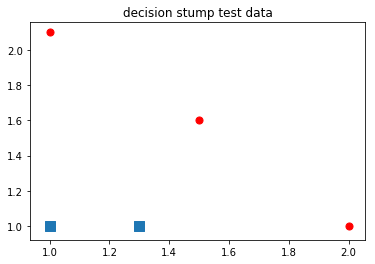

In [251]:
%run simpleDataPlot.py

In [252]:
import adaboost

In [253]:
reload(adaboost)

<module 'adaboost' from 'adaboost.pyc'>

In [254]:
datMat, classLabels = adaboost.loadSimpleData()

构建单层决策树来作为弱分类器的伪代码如下：

将最小错误率minError设置为$+\infty$  
对数据集中的每一个特征(第一层循环)：  
　　对每个步长(第二层循环)：  
   　　　　对每个不等号(第三层循环)：  
      　　　　　　建立一棵单层决策树并利用加权数据集对它进行测试  
          　　　　　　如果错误率低于minError，则将当前单层决策树设为最佳单层决策树  
返回最佳单层决策树  

In [255]:
import numpy as np

In [280]:
reload(adaboost)

<module 'adaboost' from 'adaboost.py'>

In [281]:
D = np.mat(np.ones((5,1)) / 5)

In [282]:
adaboost.buildStump(datMat, classLabels, D)

({'dim': 0, 'ineq': 'lt', 'thresh': 1.3}, matrix([[ 0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [283]:
reload(adaboost)

<module 'adaboost' from 'adaboost.pyc'>

In [284]:
classifierArray, aggClassEst = adaboost.adaBoostTrainDS(datMat, classLabels, 9)

D:  [[ 0.2  0.2  0.2  0.2  0.2]]
classEst:  [[-1.  1. -1. -1.  1.]]
aggClassEst： [[-0.69314718  0.69314718 -0.69314718 -0.69314718  0.69314718]]
total error:  0.2
D:  [[ 0.5    0.125  0.125  0.125  0.125]]
classEst:  [[ 1.  1. -1. -1. -1.]]
aggClassEst： [[ 0.27980789  1.66610226 -1.66610226 -1.66610226 -0.27980789]]
total error:  0.2
D:  [[ 0.28571429  0.07142857  0.07142857  0.07142857  0.5       ]]
classEst:  [[ 1.  1.  1.  1.  1.]]
aggClassEst： [[ 1.17568763  2.56198199 -0.77022252 -0.77022252  0.61607184]]
total error:  0.0


adaboost算法中的向量D非常重要，一开始这些权重都赋予了相同的值。在后续迭代中，adaboost算法会在增加错分数据的权重的同时，降低正确分类数据的权重。D是一个**概率分布向量** , 因此其所有元素之和为1.0。所以一开始所有元素都被初始化成1/m。

In [285]:
classifierArray

[{'alpha': 0.6931471805599453, 'dim': 0, 'ineq': 'lt', 'thresh': 1.3},
 {'alpha': 0.9729550745276565, 'dim': 1, 'ineq': 'lt', 'thresh': 1.0},
 {'alpha': 0.8958797346140273,
  'dim': 0,
  'ineq': 'lt',
  'thresh': 0.90000000000000002}]

代码中对于D权重向量的更新如下：

    expon = multiply(-1*alpha*mat(classLabels).T, classEst)
    D = multiply(D, exp(expon))
    D = D/D.sum()

这段代码表明了数据的classLabel与单层决策树分类的出来的classEst同号时，即为分类正确，得到的指数位置为$-\alpha$，否则分类错误则为$\alpha$。
numpy.multiply函数是**element-wise product**，表示对应元素相乘。代码中为两个向量的对应元素相乘，这里不是线性代数中的点积。

### 测试算法：基于AdaBoost的分类

In [286]:
reload(adaboost)

<module 'adaboost' from 'adaboost.pyc'>

In [287]:
datArr, labelArr = adaboost.loadSimpleData()

In [288]:
classifierArr, aggClassEst = adaboost.adaBoostTrainDS(datArr, labelArr, 30)

D:  [[ 0.2  0.2  0.2  0.2  0.2]]
classEst:  [[-1.  1. -1. -1.  1.]]
aggClassEst： [[-0.69314718  0.69314718 -0.69314718 -0.69314718  0.69314718]]
total error:  0.2
D:  [[ 0.5    0.125  0.125  0.125  0.125]]
classEst:  [[ 1.  1. -1. -1. -1.]]
aggClassEst： [[ 0.27980789  1.66610226 -1.66610226 -1.66610226 -0.27980789]]
total error:  0.2
D:  [[ 0.28571429  0.07142857  0.07142857  0.07142857  0.5       ]]
classEst:  [[ 1.  1.  1.  1.  1.]]
aggClassEst： [[ 1.17568763  2.56198199 -0.77022252 -0.77022252  0.61607184]]
total error:  0.0


In [289]:
classifierArr

[{'alpha': 0.6931471805599453, 'dim': 0, 'ineq': 'lt', 'thresh': 1.3},
 {'alpha': 0.9729550745276565, 'dim': 1, 'ineq': 'lt', 'thresh': 1.0},
 {'alpha': 0.8958797346140273,
  'dim': 0,
  'ineq': 'lt',
  'thresh': 0.90000000000000002}]

In [290]:
adaboost.adaClassify([0, 0], classifierArr)

matrix([[-1.]])

可以发现，随着迭代进行，数据点[0,0]的分类结果越来越强。

In [291]:
adaboost.adaClassify([5, 5], classifierArr)

matrix([[ 1.]])

In [295]:
reload(adaboost)

<module 'adaboost' from 'adaboost.py'>

In [296]:
datArr, labelArr = adaboost.loadDataSet('horseColicTraining2.txt')

In [297]:
classifierArray,aggClassEst = adaboost.adaBoostTrainDS(datArr, labelArr, 10)

total error:  0.367892976589
total error:  0.367892976589
total error:  0.357859531773
total error:  0.351170568562
total error:  0.351170568562
total error:  0.351170568562
total error:  0.347826086957
total error:  0.351170568562
total error:  0.351170568562
total error:  0.354515050167


In [298]:
testArr, testLabelArr = adaboost.loadDataSet('horseColicTest2.txt')

In [299]:
prediction10 = adaboost.adaClassify(testArr, classifierArray)

In [300]:
errArr = np.mat(np.ones((67,1)))

In [301]:
errArr[prediction10!=mat(testLabelArr).T].sum()

22.0

In [302]:
errRate = errArr[prediction10!=mat(testLabelArr).T].sum() / 67

In [303]:
errRate

0.32835820895522388

我们可以把弱分类器想成是SVM中的一个核函数，也可以按照最大化某个最小间隔的方式重写AdaBoost算法。

### 非均衡分类问题

在《机器学习实战》这本书中的算法都是基于**错误率**来衡量分类器任务的成功程度的。错误率是指**在所有测试样例中错分样例的比例** 。

我们经常使用**混淆矩阵(confusion matrix)** 来作为帮助人们更好地了解分类错误的工具。

|||||
|--|--|--|--|
|||预测结果||
|||+1|-1|
|真实结果|+1|真正例,真阳(TP)|伪反例，假阴(FN)|
|真实结果|-1|伪正例，假阳(FP)|真反例，真阴(TN)|

$$\mathbf{正确率(Accuracy)} = \frac{TP}{TP+FP}$$
$$\mathbf{召回率(Recall)} = \frac{TP}{TP+FN}$$

准确率表示的是预测为正例的样本的真正正例的比例。召回率表示的是预测为正例的样本占所有真实正例的比例。

准确率衡量的可以是预测的癌症病人中有些人不是真的得了癌症，即真的得了癌症的病人比例。召回率是一些真的得了癌症的病人没有预测出来。这个就很可怕了，所以对于癌症预测一般要提高召回率。

另一个用于度量分类中非均衡性的工具是**ROC曲线(ROC curve)** , ROC代表接收者操作特征(receiver operating characteristic)。ROC曲线不仅可以用于比较分类器，也可以基于成本效益(cost-versus-benefit)分析来做出决策。

ROC曲线的横坐标为假阳率(即FP/(FP+TN))，纵坐标为真阳率(TP/(TP+FN))。

理想情况下，**最佳的分类器应该尽可能位于左上角**。即在假阳率很低的情况下，真阳率很高。

对于不同的ROC曲线，比较曲线下的面积(Area Unser the Curve, AUC)。AUC给出的是分类器的平均性能值，当然它不能完全代替对整条曲线的观察。完美分类器的AUC为1.0，随机猜测的AUC为0.5。

In [313]:
reload(adaboost)

<module 'adaboost' from 'adaboost.py'>

In [314]:
datArr, labelArr = adaboost.loadDataSet('horseColicTraining2.txt')

In [315]:
classifierArray, aggClassEst = adaboost.adaBoostTrainDS(datArr, labelArr, 10)

total error:  0.367892976589
total error:  0.367892976589
total error:  0.357859531773
total error:  0.351170568562
total error:  0.351170568562
total error:  0.351170568562
total error:  0.347826086957
total error:  0.351170568562
total error:  0.351170568562
total error:  0.354515050167


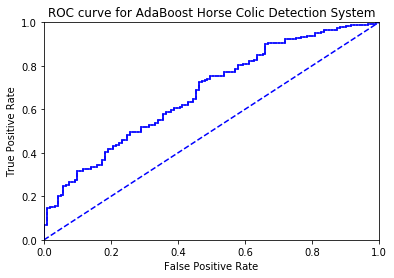

the Area under the Curve is:  0.675735908627


In [316]:
adaboost.plotROC(aggClassEst.T, labelArr)

还有一些处理非均衡数据的方法，比如**代价敏感学习(cost-sensitive learning)** 。此外，还可以对训练数据进行改造，比如**欠抽样(undersampling)** 或者**过抽样(oversampling)** 来实现。过抽样意味着复制样例，而欠抽样意味着删除样例。